In [1]:
import sys
sys.path.append('..')

import numpy as np

import torch
from torch.utils.data.dataset import Dataset
from torch.utils.data.dataloader import DataLoader

from transformers import AutoConfig, AutoModel, AutoModelForSequenceClassification, AutoTokenizer
from transformers import GlueDataTrainingArguments as DataTrainingArguments
from transformers import GlueDataset, default_data_collator

import seaborn
import matplotlib.pyplot as plt

from hans.utils_hans import HansDataset, hans_processors

In [2]:
MODEL_PATH_SMALL = '/home/nlp/experiments/big_small/small/'
MODEL_PATH_BIG = '/home/nlp/experiments/big_small/big/'

In [3]:
config = AutoConfig.from_pretrained(MODEL_PATH_SMALL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_PATH_SMALL, config=config)
tokenizer = AutoTokenizer.from_pretrained(MODEL_PATH_SMALL)

In [4]:
mnli_data_args = DataTrainingArguments(task_name = 'mnli', data_dir = '/home/nlp/data/glue_data/MNLI')
hans_data_args = DataTrainingArguments(task_name = 'hans', data_dir = '/home/nlp/data/glue_data/hans')

In [5]:
def put_on_cuda(model, batch):
    for k,v in batch.items():
        batch[k] = v.cuda()
    return model.cuda(), batch

## Finding incorrect samples

In [6]:
def hans_data_collator(features):
    """
    Data collator that removes the "pairID" key if present.
    """
    batch = default_data_collator(features)
    _ = batch.pop("pairID", None)
    return batch

In [7]:
mnli_eval_dataset = GlueDataset(mnli_data_args, tokenizer, mode="dev")
hans_eval_dataset = HansDataset(
            data_dir=hans_data_args.data_dir,
            tokenizer=tokenizer,
            task=hans_data_args.task_name,
            max_seq_length=hans_data_args.max_seq_length,
            overwrite_cache=hans_data_args.overwrite_cache,
            evaluate=True
        )

In [8]:
mnli_eval_dl = DataLoader(mnli_eval_dataset,collate_fn = default_data_collator,
                            batch_size=128, shuffle=False)
hans_eval_dl = DataLoader(hans_eval_dataset,collate_fn = hans_data_collator,
                            batch_size=128, shuffle=False)

## HANS analysis

In [9]:
batch = next(iter(hans_eval_dl))

In [11]:
for i in hans_eval_dl:
    for j in range(len(i)):
        print(tokenizer.decode(i['input_ids'][j]))

[CLS] the president advised the doctor. [SEP] the doctor advised the president. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
[CLS] the student saw the managers. [SEP] the managers saw the student. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [P

[CLS] the authors near the presidents mentioned the managers. [SEP] the authors mentioned the managers. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
[CLS] the judges in front of the professors contacted the lawyers. [SEP] the judges contacted the lawyers. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PA

[CLS] the doctor investigated in the museum encouraged the artists. [SEP] the doctor investigated in the museum. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
[CLS] the actors studied in the school thanked the bankers. [SEP] the actors studied in the school. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [

[CLS] unless the manager danced, the secretary mentioned the lawyers. [SEP] the secretary mentioned the lawyers. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
[CLS] if the lawyer slept, the doctors danced. [SEP] the doctors danced. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD

[CLS] clearly the tourists resigned. [SEP] the tourists resigned. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
[CLS] of course the professor ran. [SEP] the professor ran. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD

In [12]:
model, batch = put_on_cuda(model, batch)

In [13]:
with torch.no_grad():
    model.eval()
    logits = model(**batch)[1].detach().cpu().numpy()
    label_ids = batch['labels'].cpu().numpy()
    preds = np.argmax(logits, axis=1)

In [14]:
tokenizer.decode(batch['input_ids'][20])

'[CLS] the secretary introduced the judge. [SEP] the judge introduced the secretary. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]'

In [17]:
text_a = "the secretary introduced the judge"
text_b = "the judge introduced the secretary"
tok1 = tokenizer.tokenize(text_a)
tok2 = tokenizer.tokenize(text_b)
tok = tok1+tok2
# p_pos = len(tok1)

In [18]:
model_name_or_path = MODEL_PATH_SMALL

In [19]:
config = AutoConfig.from_pretrained(model_name_or_path, output_attentions=True)
model = AutoModel.from_pretrained(model_name_or_path, config=config).eval().cuda()

In [20]:
ids = torch.tensor(tokenizer.convert_tokens_to_ids(tok)).unsqueeze(0).to('cuda')

In [21]:
output = model(ids)
attentions = torch.cat(output[2]).to('cpu').detach().numpy()

In [22]:
def draw(data, x, y, ax):
    seaborn.heatmap(data, 
                    xticklabels=x, square=True, yticklabels=y, vmin=0.0, vmax=1.0, 
                    cbar=False, ax=ax)

In [23]:
layers_to_check = [0, 6, 8, 11]

Encoder Layer 1


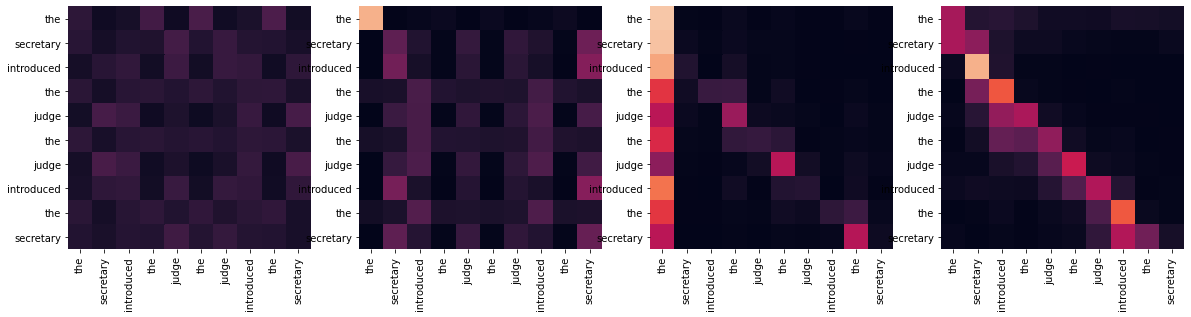

Encoder Layer 7


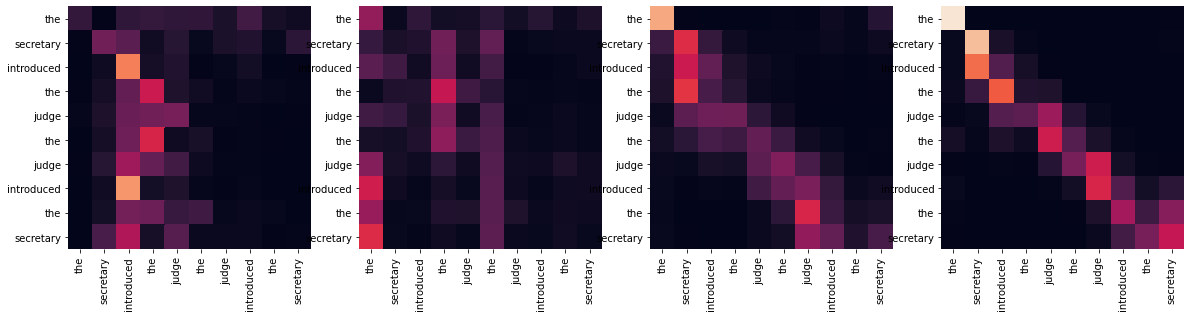

Encoder Layer 9


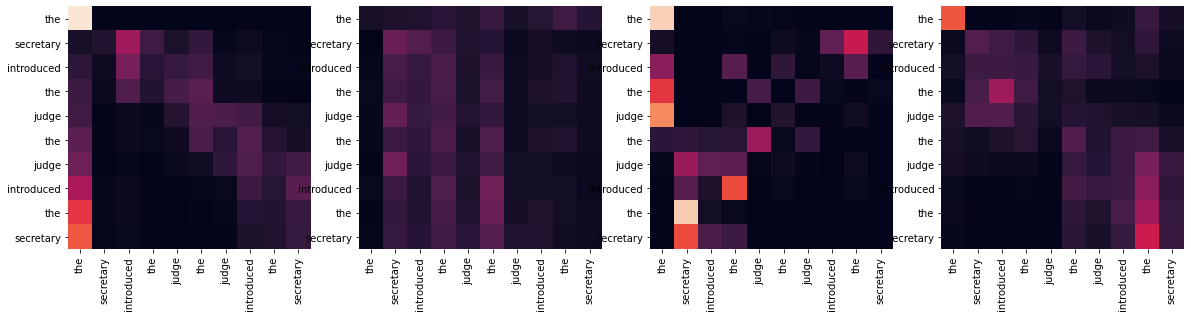

Encoder Layer 12


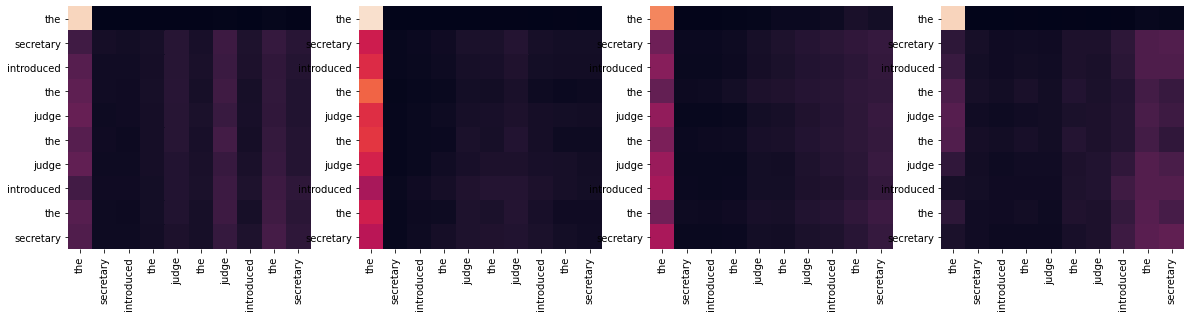

In [24]:
# for layer in range(0, 12, 2):
for layer in layers_to_check:
    fig, axs = plt.subplots(1,4, figsize=(20, 10))
    print("Encoder Layer", layer+1)
    for h in range(4):
        draw(attentions[layer][h], 
            tok, tok, ax=axs[h])
    plt.show()

In [135]:
attentions[0].mean(axis=0).shape

(10, 10)

In [ ]:
for layers in layers_to_check:
    fig, axs = plt.subplots(1,1, figsize=(8, 6))
    draw(attentions[layers].mean(axis=0), 
            tok, tok, ax=axs)
    plt.show()

## MNLI analysis

In [74]:
# small (array([ 10,  14,  15,  20,  24,  29,  31,  32,  38,  41,  47,  52,  59,
#         61,  65,  69,  71,  73,  75,  79,  80,  87,  97, 104, 110, 122]),)
    
# big (array([ 15,  23,  25,  38,  41,  47,  56,  59,  71,  73,  75,  79,  80,
#        104, 110]),)

(array([ 10,  14,  15,  20,  24,  29,  31,  32,  38,  41,  47,  52,  59,
         61,  65,  69,  71,  73,  75,  79,  80,  87,  97, 104, 110, 122]),)

In [82]:
np.where(label_ids != preds)

(array([ 15,  23,  25,  38,  41,  47,  56,  59,  71,  73,  75,  79,  80,
        104, 110]),)

In [112]:
label_ids

array([2, 0, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 1, 2, 1, 1, 1, 2, 0, 2, 1,
       2, 2, 2, 0, 2, 0, 2, 2, 1, 1, 0, 1, 1, 2, 2, 1, 1, 0, 2, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 2, 0, 1, 2, 0, 2, 1, 0, 0, 2, 2, 1, 2, 0, 0, 2,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 2, 1, 2, 0, 0, 1, 1, 2, 0, 2, 0, 1, 2,
       1, 1, 2, 2, 0, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 2, 0, 1])

In [113]:
torch.save({'samples': batch}, '/home/nlp/samples.pth')

In [111]:
tokenizer.decode(batch['input_ids'][122].tolist())

'[CLS] candidates must submit a set of fingerprints for review by the fbi. [SEP] people that want the job have to have their fingerprints sent to the fbi. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]'

## Attention analysis

In [60]:
mnli_batch = torch.load('/home/nlp/samples.pth')['samples']

In [151]:
label_dict = {0: 'contradiction', 1: 'entailment', 2: 'neutral'}

In [27]:
def get_sample_from_batch(batch, idx):
    sample = {}
    for keys, values in batch.items():
        sample[keys] = values[idx].unsqueeze(0)
    sentence = tokenizer.decode(batch['input_ids'][idx])#, skip_special_tokens = True)
    return sample, sentence

In [28]:
def get_model_preds_and_gt(sample, model_path, label_dict):
    model = AutoModelForSequenceClassification.from_pretrained(model_path)
    model, sample = put_on_cuda(model, sample)
    logits = model(**sample)[1].detach().cpu().numpy()
    output = np.argmax(logits, axis=1)
    return label_dict[output[0]], label_dict[sample['labels'].item()]

In [29]:
def get_attention(model, sample):
    model, sample = put_on_cuda(model, sample)
    sample.pop('labels')
    output = model(**sample)[2:]
    return output

In [160]:
sample, sentence = get_sample_from_batch(batch, 15)

In [120]:
model_pred, gt = get_model_preds_and_gt(sample, MODEL_PATH_SMALL, label_dict)

In [161]:
sentence, model_pred, gt

("[CLS] i'm not sure what the overnight low was [SEP] i don't know how cold it got last night. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]",
 'neutral',
 'entailment')

In [31]:
text_a = "i'm not sure what the overnight low was"
text_b = "i don't know how cold it got last night"
tok1 = tokenizer.tokenize(text_a)
tok2 = tokenizer.tokenize(text_b)
tok = tok1+tok2
p_pos = len(tok1)

In [164]:
model_name_or_path = MODEL_PATH_SMALL

In [165]:
config = AutoConfig.from_pretrained(model_name_or_path, output_attentions=True)
model = AutoModel.from_pretrained(model_name_or_path, config=config)

In [170]:
ids = torch.tensor(tokenizer.convert_tokens_to_ids(tok)).unsqueeze(0).to('cuda')

In [171]:
output = model(ids)

In [172]:
attentions = torch.cat(output[2]).to('cpu')

In [177]:
attentions = attentions.permute(2,1,0,3)
print(attentions.shape) #(sequence_length, num_heads, layer, sequence_length)

torch.Size([21, 12, 12, 21])


In [178]:
layers = len(attentions[0][0])
heads = len(attentions[0])
seqlen = len(attentions)
layers,heads,seqlen

(12, 12, 21)

In [191]:
tok[11]

'don'

In [192]:
attentions_pos = attentions[p_pos]
attentions_pos.shape

torch.Size([12, 12, 21])

Attention weights for token i


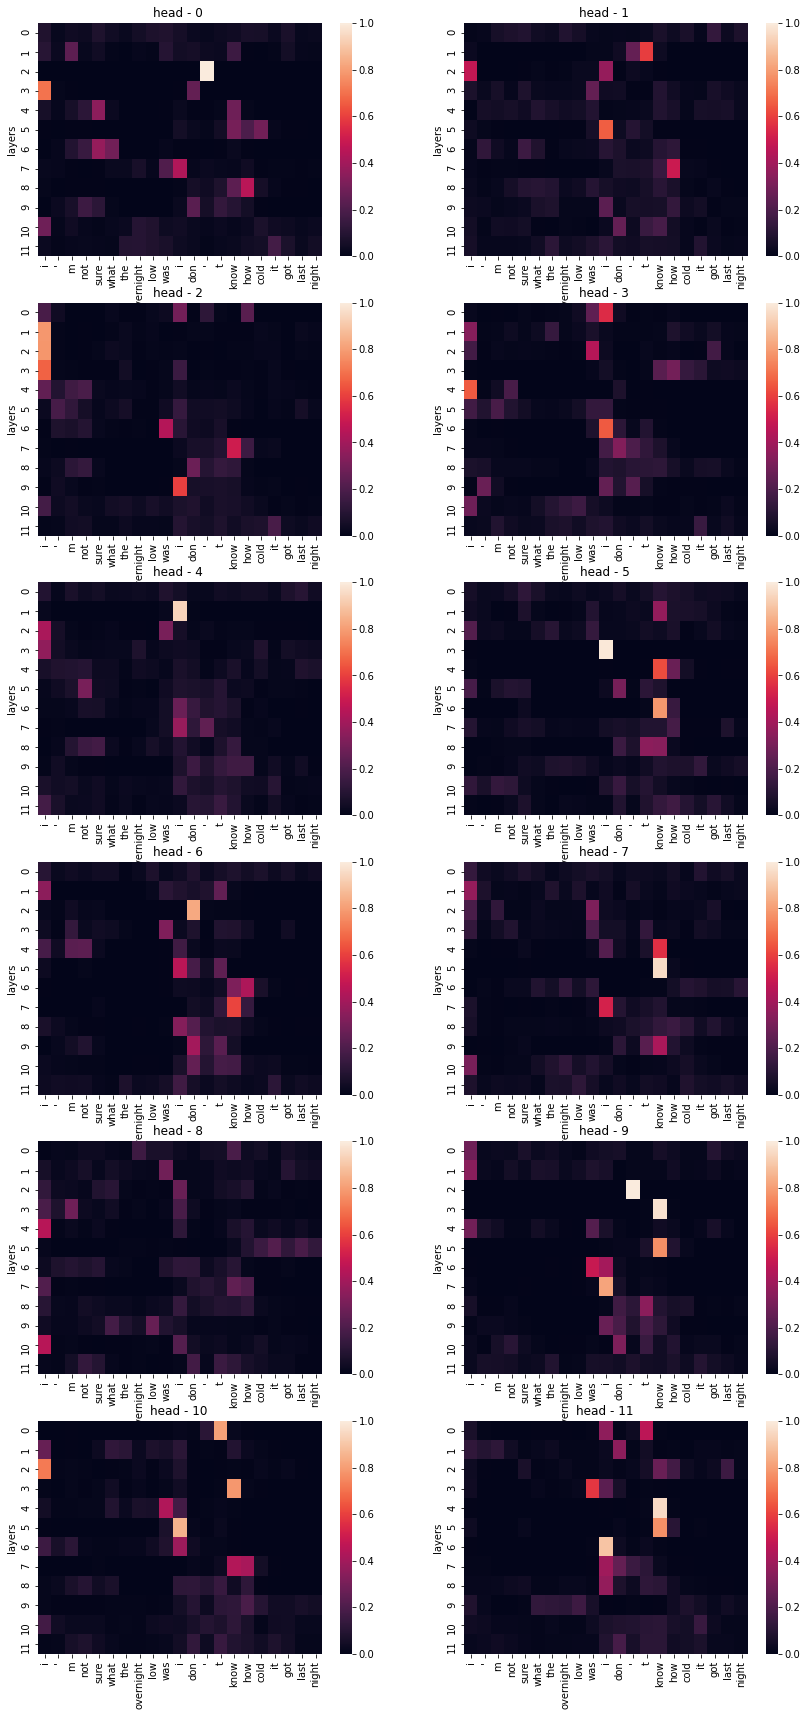

In [196]:
cols = 2
rows = int(heads/cols)

fig, axes = plt.subplots( rows,cols, figsize = (14,30))
axes = axes.flat
print ('Attention weights for token', tok[p_pos])
for i,att in enumerate(attentions_pos):

    #im = axes[i].imshow(att, cmap='gray')
    sns.heatmap(att.detach(),vmin = 0, vmax = 1,ax = axes[i], xticklabels = tok)
    axes[i].set_title(f'head - {i} ' )
    axes[i].set_ylabel('layers')

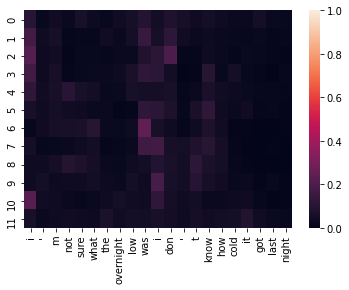

In [184]:
avg_attention = attentions_pos.detach().mean(dim = 0)
sns.heatmap(avg_attention,vmin = 0, vmax = 1, xticklabels= tok, )

In [185]:
tok

['i',
 "'",
 'm',
 'not',
 'sure',
 'what',
 'the',
 'overnight',
 'low',
 'was',
 'i',
 'don',
 "'",
 't',
 'know',
 'how',
 'cold',
 'it',
 'got',
 'last',
 'night']